## 1. Setup and Imports

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Add src to path
sys.path.append('../')

from src.data.preprocessing import clean_data

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Imports completed successfully")

Imports completed successfully


## 2. Data Acquisition

In [2]:
# Run data download script
print("Downloading Heart Disease dataset...")
!python ../src/data/download_data.py

Starting Heart Disease dataset download...
Output directory: /home/ksr11/workspace/M_TECH/sem3/MLOPS/Project2/mlops-heart-disease-prediction/notebooks/data/raw
Saved to data/raw/processed.cleveland.data
Saved to data/raw/processed.hungarian.data
Saved to data/raw/processed.switzerland.data
Saved to data/raw/processed.va.data

Combined dataset saved to data/raw/heart_disease_combined.csv
Total records: 920
Total features: 14

Dataset Info:
Shape: (920, 14)
Missing values: 1759
Target distribution:
target
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

Data download completed successfully!


## 3. Load and Inspect Data

In [3]:
# Load the combined dataset
data_path = Path('../data/raw')

# Try to load combined dataset first
if (data_path / 'heart_disease_combined.csv').exists():
    df = pd.read_csv(data_path / 'heart_disease_combined.csv')
    print("Loaded combined dataset")
elif (data_path / 'heart_disease.csv').exists():
    df = pd.read_csv(data_path / 'heart_disease.csv')
    print("Loaded alternative dataset")
else:
    raise FileNotFoundError("No heart disease dataset found in data/raw/")

print(f"\nDataset shape: {df.shape}")
print(f"Number of records: {len(df)}")
print(f"Number of features: {len(df.columns)}")

Loaded combined dataset

Dataset shape: (920, 14)
Number of records: 920
Number of features: 14


In [4]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
# Dataset information
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    float64
 6   restecg   918 non-null    float64
 7   thalach   865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  target    920 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 100.8 KB


In [6]:
# Statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


## 4. Data Quality Assessment

In [7]:
# Check for missing values
print("Missing Values Count:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False))

Missing Values Count:
          Missing_Count  Percentage
ca                  611   66.413043
thal                486   52.826087
slope               309   33.586957
fbs                  90    9.782609
oldpeak              62    6.739130
trestbps             59    6.413043
exang                55    5.978261
thalach              55    5.978261
chol                 30    3.260870
restecg               2    0.217391


In [8]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates/len(df))*100:.2f}%")

Number of duplicate rows: 2
Percentage of duplicates: 0.22%


In [9]:
# Data types
print("Data Types:")
print(df.dtypes)

Data Types:
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object


## 5. Target Variable Analysis

In [10]:
# Identify target column (may be 'target', 'num', or 'condition')
target_col = 'target' if 'target' in df.columns else (
    'num' if 'num' in df.columns else (
        'condition' if 'condition' in df.columns else df.columns[-1]
    )
)

print(f"Target column: {target_col}")
print(f"\nTarget value distribution:")
print(df[target_col].value_counts().sort_index())

# Convert to binary if needed (0: no disease, >0: disease)
df['target_binary'] = (df[target_col] > 0).astype(int)
print(f"\nBinary target distribution:")
print(df['target_binary'].value_counts())
print(f"\nClass balance:")
print(df['target_binary'].value_counts(normalize=True))

Target column: target

Target value distribution:
target
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

Binary target distribution:
target_binary
1    509
0    411
Name: count, dtype: int64

Class balance:
target_binary
1    0.553261
0    0.446739
Name: proportion, dtype: float64


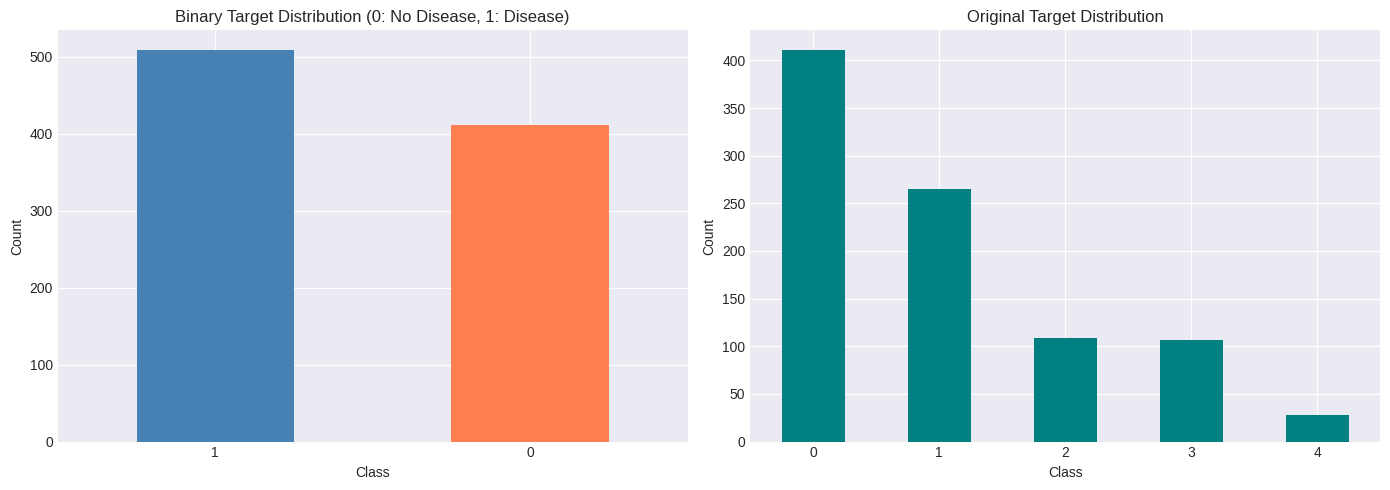

Target distribution plot saved


In [11]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Binary target
df['target_binary'].value_counts().plot(kind='bar', ax=axes[0], color=['steelblue', 'coral'])
axes[0].set_title('Binary Target Distribution (0: No Disease, 1: Disease)', fontsize=12)
axes[0].set_xlabel('Class', fontsize=10)
axes[0].set_ylabel('Count', fontsize=10)
axes[0].tick_params(rotation=0)

# Original target
df[target_col].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='teal')
axes[1].set_title('Original Target Distribution', fontsize=12)
axes[1].set_xlabel('Class', fontsize=10)
axes[1].set_ylabel('Count', fontsize=10)
axes[1].tick_params(rotation=0)

plt.tight_layout()
plt.savefig('../data/processed/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Target distribution plot saved")

## 6. Feature Analysis

In [12]:
# Get feature columns (exclude target)
feature_cols = [col for col in df.columns if col not in [target_col, 'target_binary']]

# Separate numerical and categorical features
numerical_features = df[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df[feature_cols].select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Total features: {len(feature_cols)}")
print(f"Numerical features ({len(numerical_features)}): {numerical_features}")
print(f"Categorical features ({len(categorical_features)}): {categorical_features}")

Total features: 13
Numerical features (13): ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Categorical features (0): []


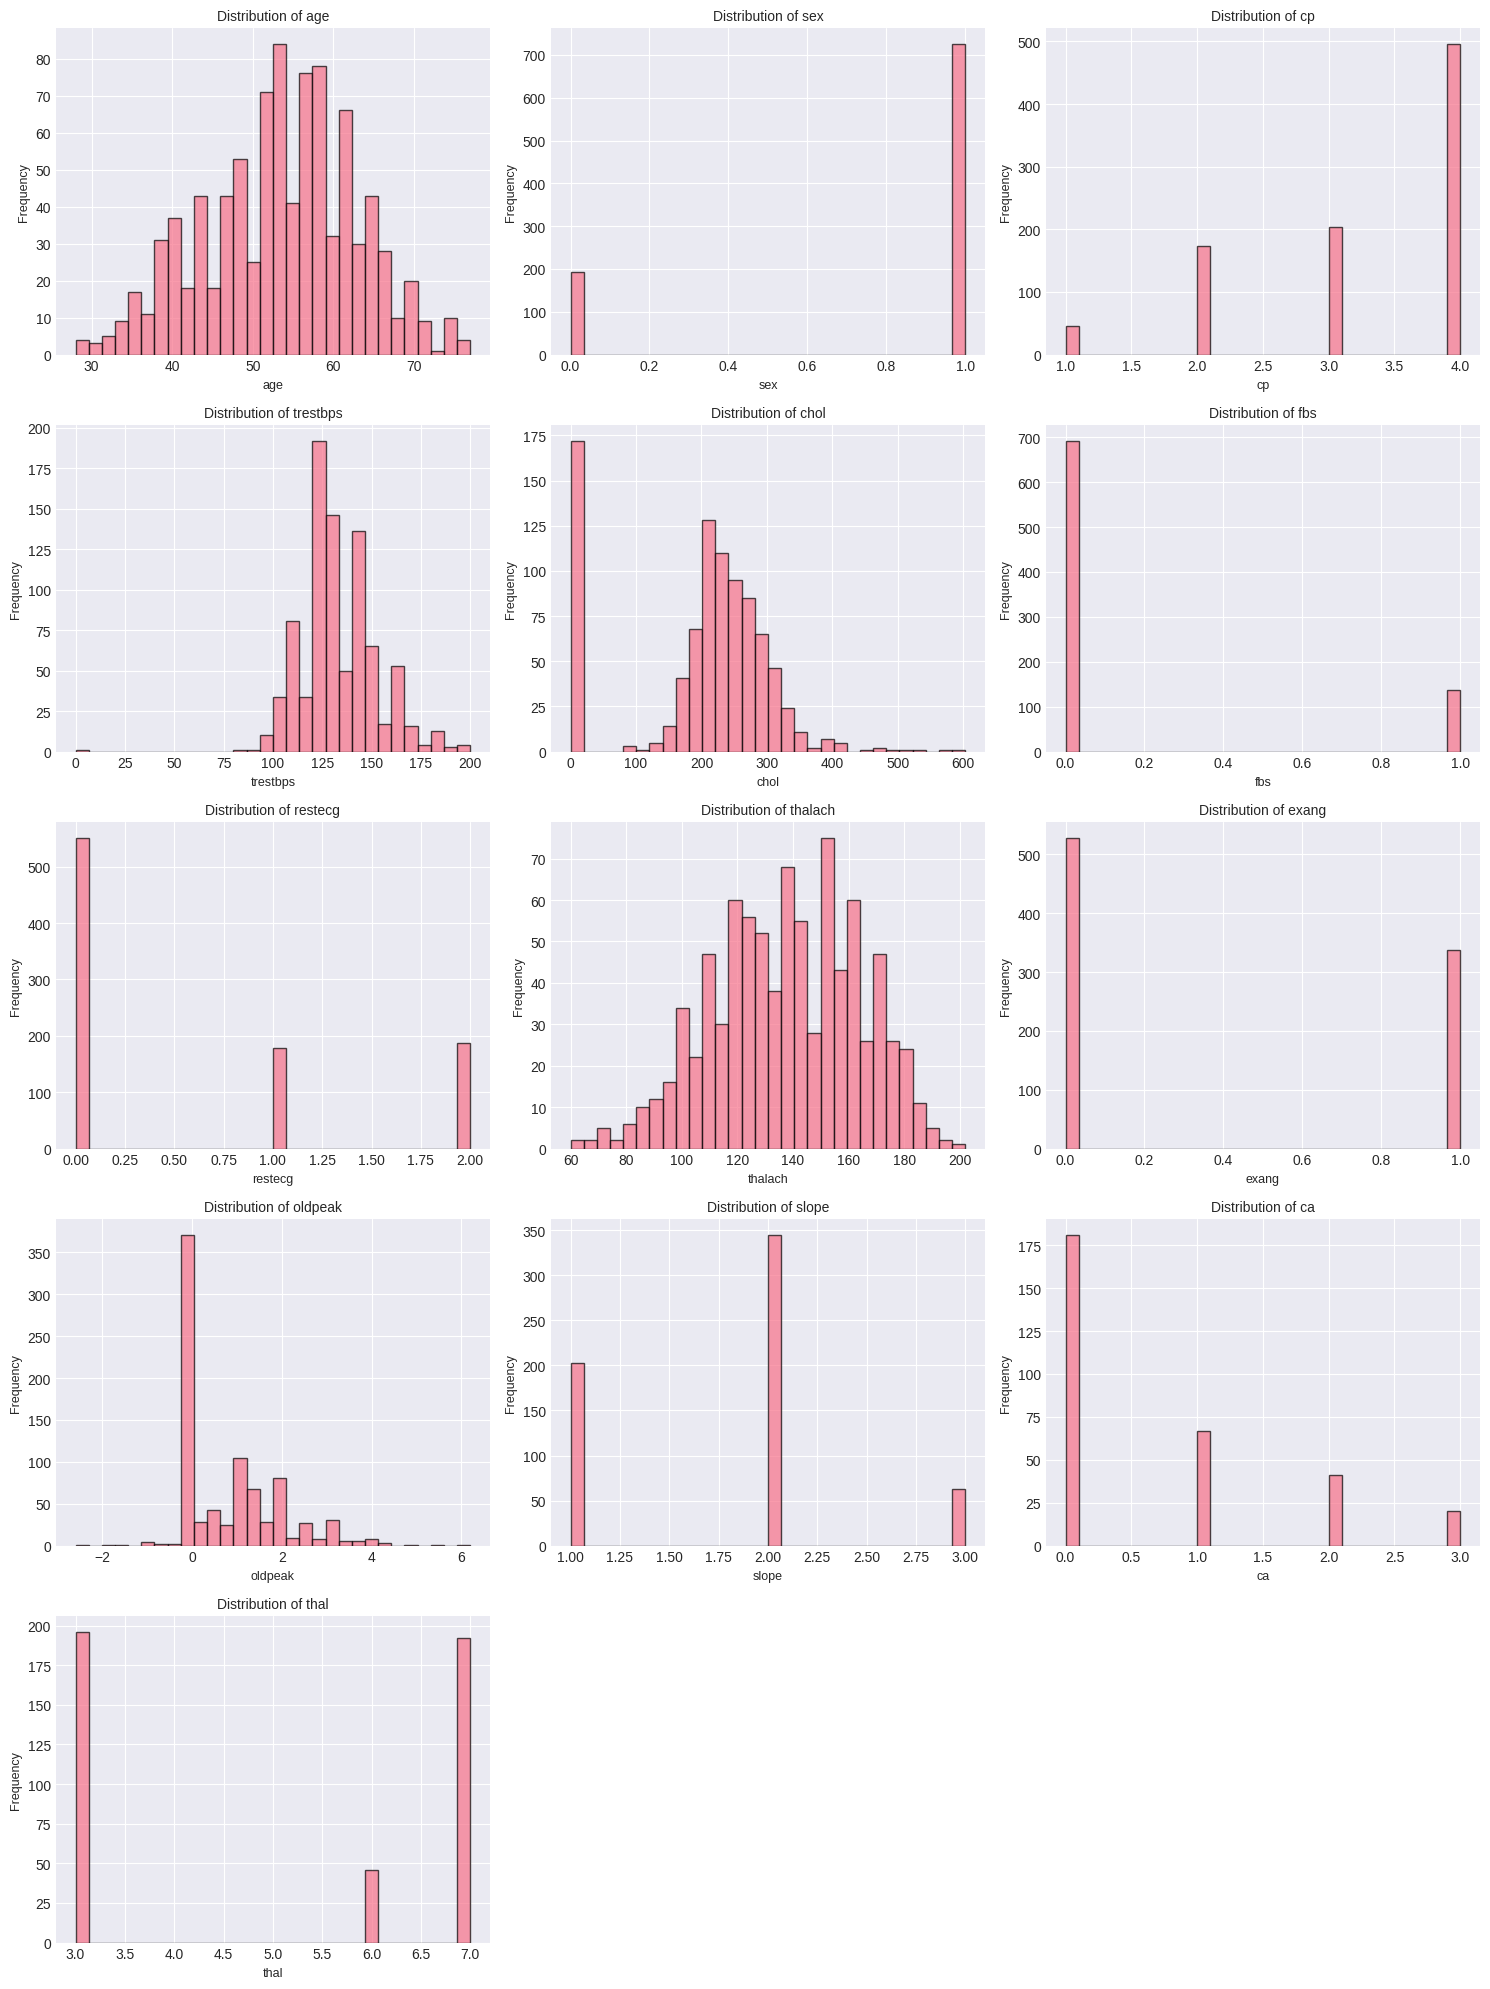

Feature distribution plots saved


In [13]:
# Distribution of numerical features
if numerical_features:
    n_features = len(numerical_features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.flatten() if n_features > 1 else [axes]
    
    for idx, feature in enumerate(numerical_features):
        axes[idx].hist(df[feature].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {feature}', fontsize=10)
        axes[idx].set_xlabel(feature, fontsize=9)
        axes[idx].set_ylabel('Frequency', fontsize=9)
    
    # Hide empty subplots
    for idx in range(n_features, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.savefig('../data/processed/feature_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Feature distribution plots saved")

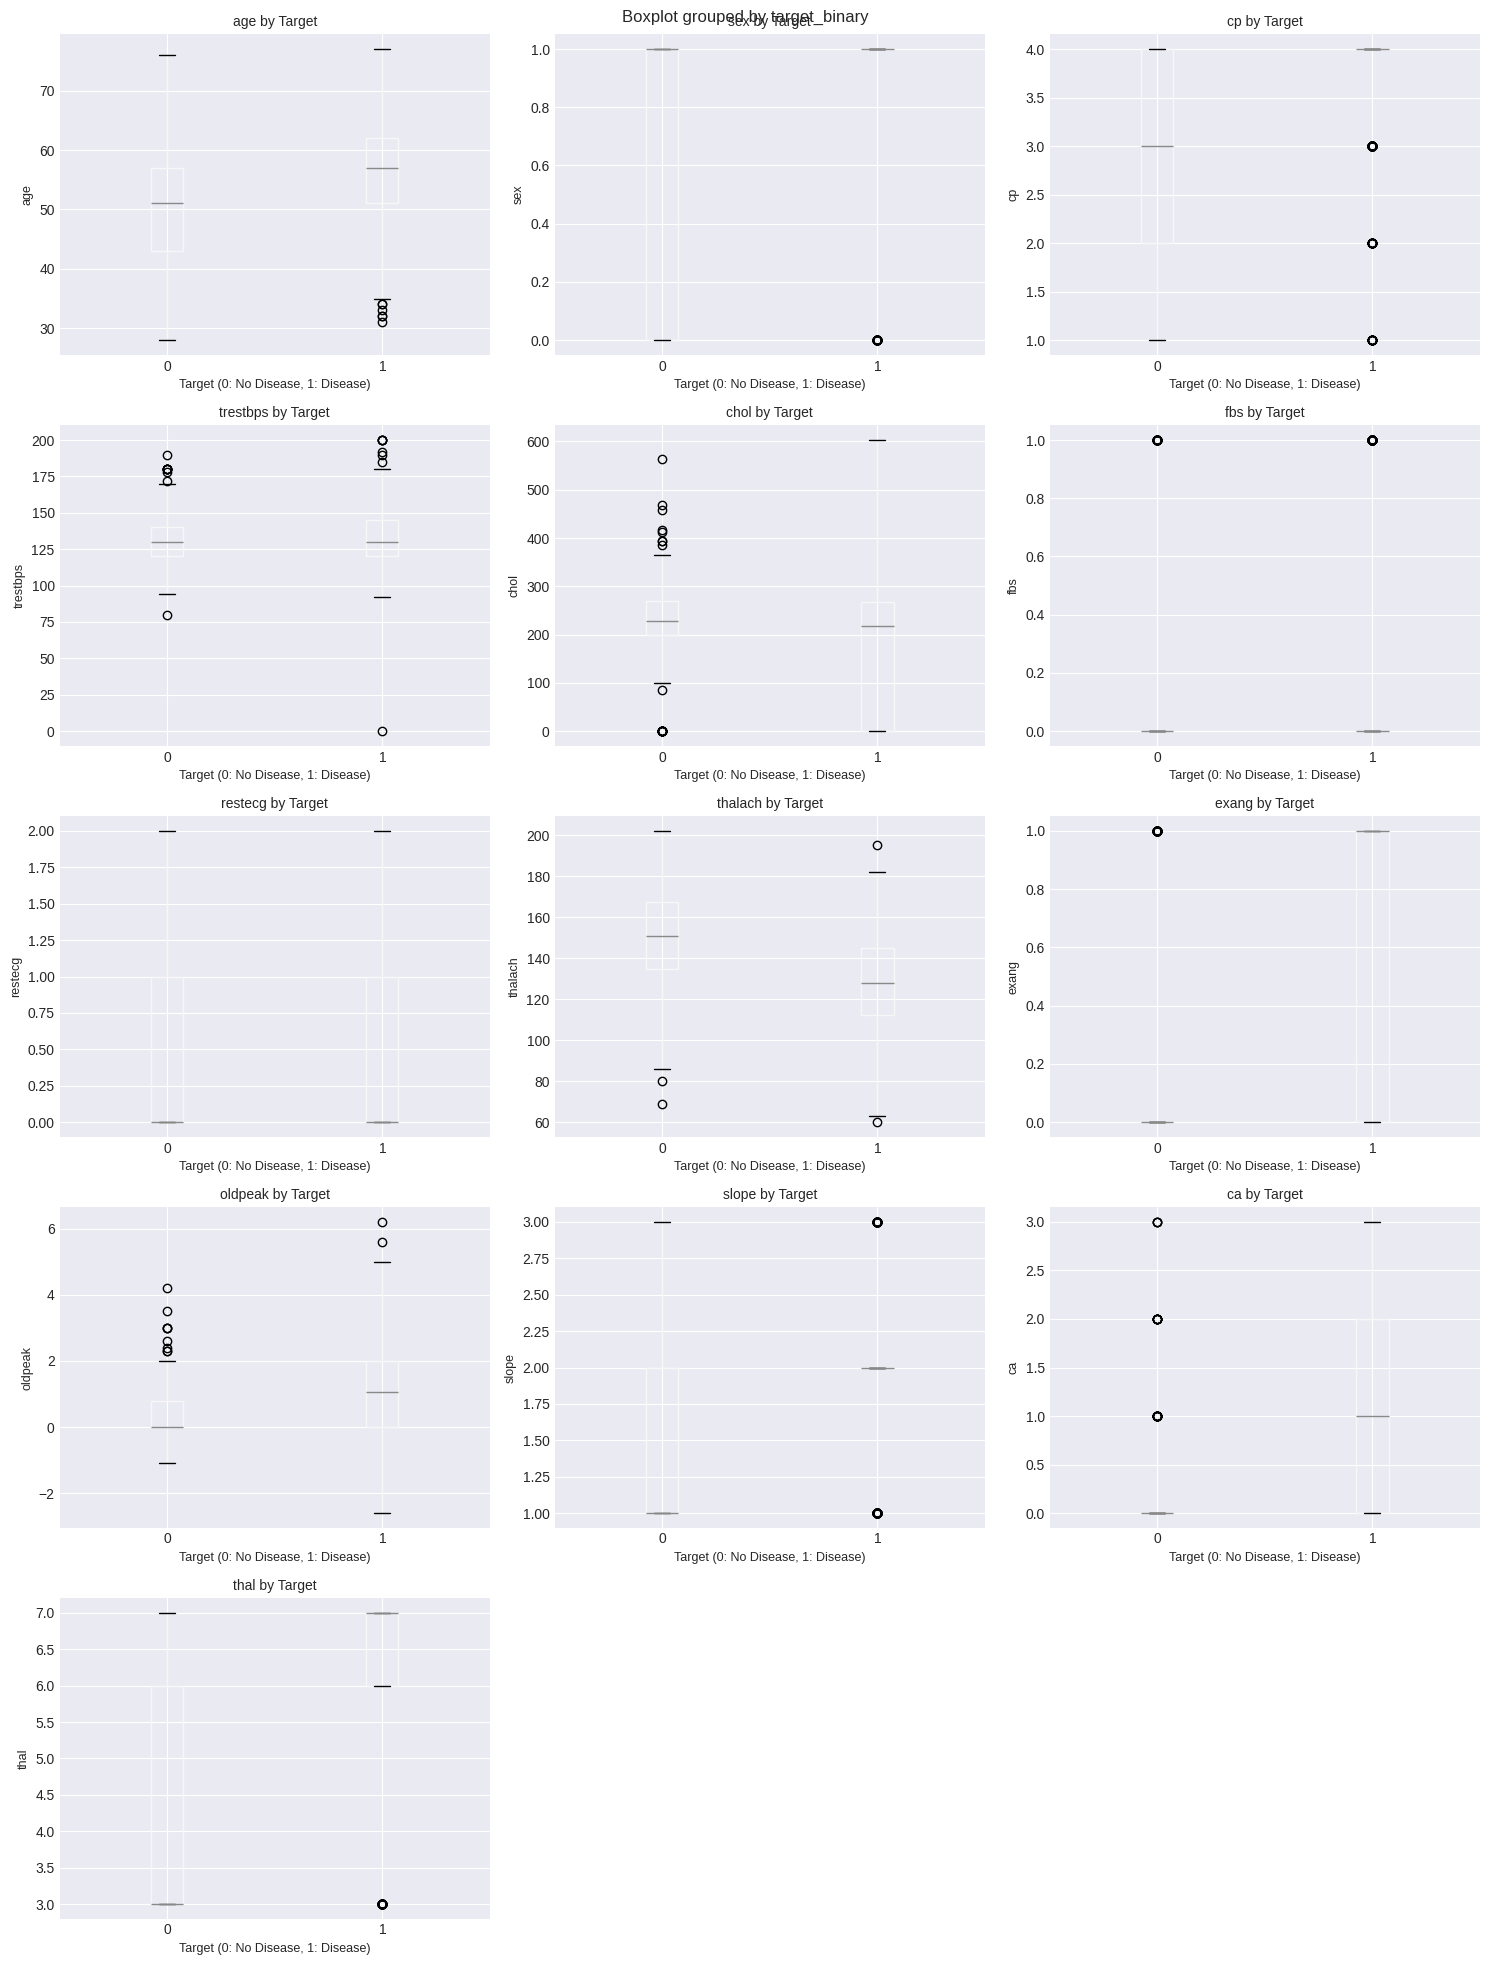

Feature boxplot saved


In [14]:
# Box plots for numerical features by target
if numerical_features:
    n_features = len(numerical_features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.flatten() if n_features > 1 else [axes]
    
    for idx, feature in enumerate(numerical_features):
        df.boxplot(column=feature, by='target_binary', ax=axes[idx])
        axes[idx].set_title(f'{feature} by Target', fontsize=10)
        axes[idx].set_xlabel('Target (0: No Disease, 1: Disease)', fontsize=9)
        axes[idx].set_ylabel(feature, fontsize=9)
    
    # Hide empty subplots
    for idx in range(n_features, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.savefig('../data/processed/feature_boxplots.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Feature boxplot saved")

## 7. Correlation Analysis

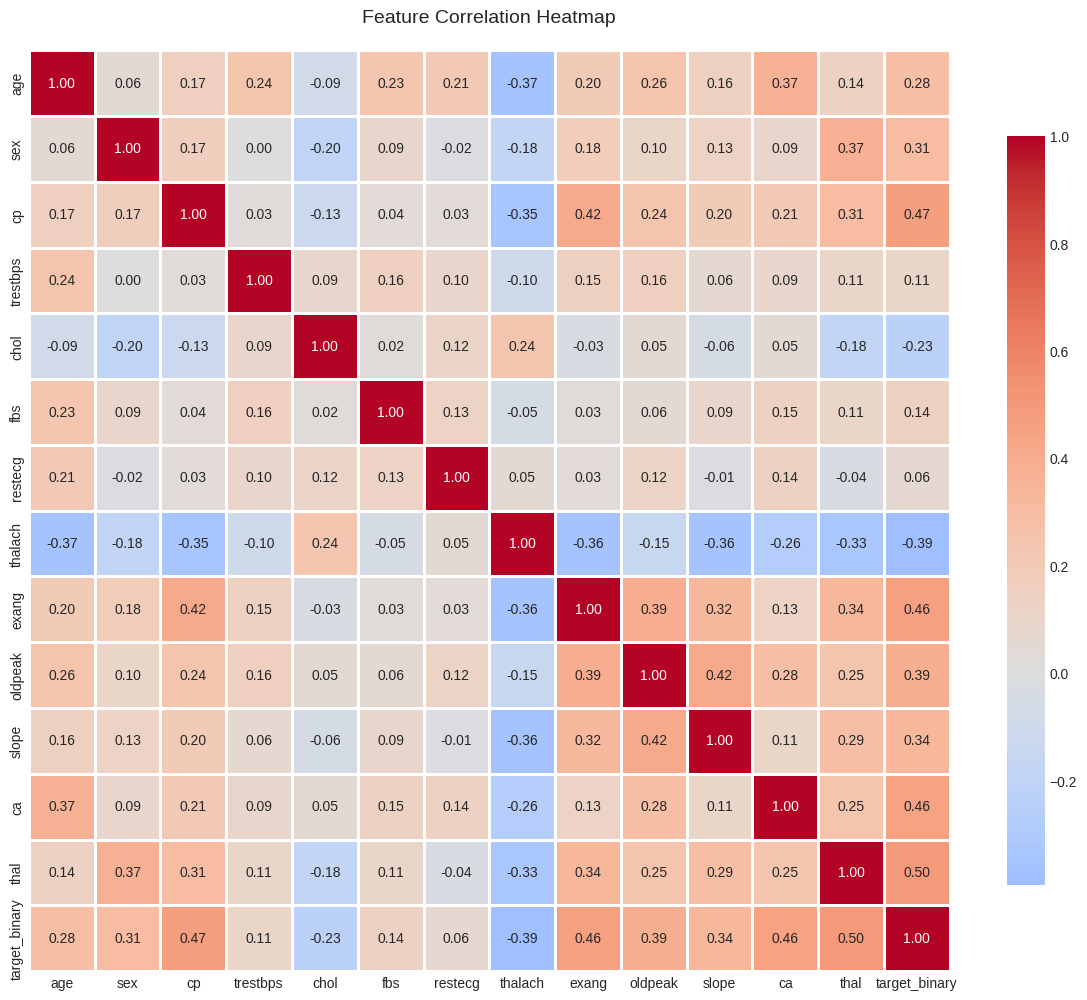

Correlation heatmap saved

Top 10 correlations with target:
thal       0.498521
cp         0.471712
exang      0.463619
ca         0.455599
thalach    0.394503
oldpeak    0.385528
slope      0.337086
sex        0.307284
age        0.282700
chol       0.230583
Name: target_binary, dtype: float64


In [15]:
# Correlation matrix for numerical features
if numerical_features:
    # Include target in correlation
    corr_features = numerical_features + ['target_binary']
    correlation_matrix = df[corr_features].corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        center=0,
        square=True,
        linewidths=1,
        cbar_kws={"shrink": 0.8}
    )
    plt.title('Feature Correlation Heatmap', fontsize=14, pad=20)
    plt.tight_layout()
    plt.savefig('../data/processed/correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Correlation heatmap saved")
    
    # Show top correlations with target
    print("\nTop 10 correlations with target:")
    target_corr = correlation_matrix['target_binary'].abs().sort_values(ascending=False)
    print(target_corr[1:11])  # Exclude self-correlation

## 8. Data Cleaning

In [16]:
# Use target_binary as the main target
df_clean = df.copy()
if 'target' not in df_clean.columns:
    df_clean['target'] = df_clean['target_binary']
else:
    df_clean['target'] = df_clean['target_binary']

# Drop temporary column
if 'target_binary' in df_clean.columns and 'target' in df_clean.columns:
    df_clean = df_clean.drop(columns=['target_binary'])

# Clean the data
df_clean = clean_data(df_clean, target_col='target')

Starting data cleaning...
Initial shape: (920, 14)
Initial missing values: 1759
Filled trestbps missing values with median: 130.0
Filled chol missing values with median: 223.0
Filled fbs missing values with median: 0.0
Filled restecg missing values with median: 0.0
Filled thalach missing values with median: 140.0
Filled exang missing values with median: 0.0
Filled oldpeak missing values with median: 0.5
Filled slope missing values with median: 2.0
Filled ca missing values with median: 0.0
Filled thal missing values with median: 6.0
Removed 2 duplicate rows
Final shape: (918, 14)
Final missing values: 0
Data cleaning completed


In [17]:
# Verify cleaned data
print("Cleaned data summary:")
print(f"Shape: {df_clean.shape}")
print(f"Missing values: {df_clean.isnull().sum().sum()}")
print(f"Duplicates: {df_clean.duplicated().sum()}")
print(f"\nTarget distribution:")
print(df_clean['target'].value_counts())

Cleaned data summary:
Shape: (918, 14)
Missing values: 0
Duplicates: 0

Target distribution:
target
1    508
0    410
Name: count, dtype: int64


## 9. Save Processed Data

In [18]:
# Save cleaned dataset
output_path = Path('../data/processed/heart_disease_clean.csv')
output_path.parent.mkdir(parents=True, exist_ok=True)
df_clean.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to {output_path}")
print(f"Shape: {df_clean.shape}")

Cleaned dataset saved to ../data/processed/heart_disease_clean.csv
Shape: (918, 14)


## 10. Summary Statistics

In [19]:
# Create summary report
summary = {
    'Total Records': len(df_clean),
    'Total Features': len(df_clean.columns) - 1,  # Excluding target
    'Numerical Features': len(numerical_features),
    'Categorical Features': len(categorical_features),
    'Missing Values': df_clean.isnull().sum().sum(),
    'Duplicate Rows': 0,
    'Class 0 (No Disease)': (df_clean['target'] == 0).sum(),
    'Class 1 (Disease)': (df_clean['target'] == 1).sum(),
    'Class Balance Ratio': f"{(df_clean['target'] == 1).sum() / len(df_clean):.2%}"
}

print("\nData Summary:")
print("="*50)
for key, value in summary.items():
    print(f"{key}: {value}")
print("="*50)


Data Summary:
Total Records: 918
Total Features: 13
Numerical Features: 13
Categorical Features: 0
Missing Values: 0
Duplicate Rows: 0
Class 0 (No Disease): 410
Class 1 (Disease): 508
Class Balance Ratio: 55.34%


## Conclusion

This notebook completed:
- Data acquisition from UCI ML Repository
- Initial data exploration and quality assessment
- Data cleaning and handling missing values
- Comprehensive EDA with visualizations
- Correlation analysis
- Data preprocessing and storage

The cleaned data is ready for feature engineering and model development.